In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds

In [2]:
MNIST = ds.load_digits()
xdata = MNIST.data.astype(np.float32)
tdata = MNIST.target.astype(np.int32)

In [3]:
D,N = xdata.shape
print(D,N)

1797 64


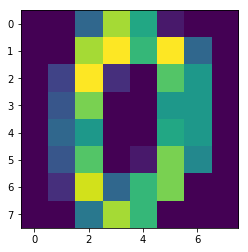

In [4]:
plt.imshow(xdata[0,:].reshape(8,8))
plt.show()

In [5]:
def data_divide(Dtrain,D,xdata,tdata):
    index = np.random.permutation(range(D))
    xtrain = xdata[index[0:Dtrain],:]
    ttrain = tdata[index[0:Dtrain]]
    xtest = xdata[index[Dtrain:D],:]
    ttest = tdata[index[Dtrain:D]]
    return xtrain,ttrain,xtest,ttest

In [6]:
Dtrain = D//2
xtrain,ttrain,xtest,ttest = data_divide(Dtrain,D,xdata,tdata)

In [7]:
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable,Chain,config

In [8]:
C = tdata.max()+1
NN = Chain(l1=L.Linear(N,20),l2=L.Linear(20,C))

In [9]:
def model(x):
    h = NN.l1(x)
    h = F.relu(h)
    y = NN.l2(h)
    return y

In [10]:
optNN = Opt.MomentumSGD()
optNN.setup(NN)

In [11]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

In [12]:
T = 200

for time in range(T):
    config.train = True
    optNN.target.zerograds()
    ytrain = model(xtrain)
    loss_train = F.softmax_cross_entropy(ytrain,ttrain)
    acc_train = F.accuracy(ytrain,ttrain)
    loss_train.backward()
    optNN.update()
    
    config.train = False
    ytest = model(xtest)
    loss_test = F.softmax_cross_entropy(ytest,ttest)
    acc_test = F.accuracy(ytest,ttest)
    train_loss.append(loss_train.data)
    train_acc.append(acc_train.data)
    test_loss.append(loss_test.data)
    test_acc.append(acc_test.data)

In [13]:
def plot_result2(result1,result2,title,xlabel,ylabel,ymin=0.0,ymax=1.0):
    Tall = len(result1)
    plt.figure(figsize=(8,6))
    plt.plot(range(Tall), result1)
    plt.plot(range(Tall), result2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim([0,Tall])
    plt.ylim([ymin,ymax])
    plt.show()              

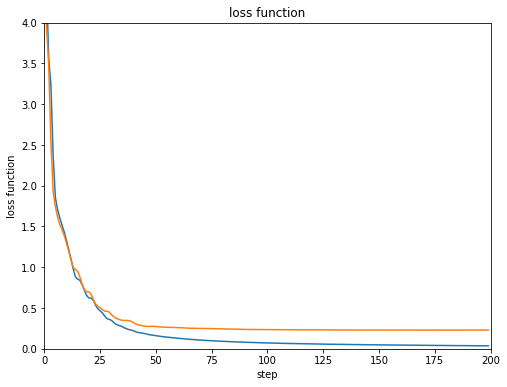

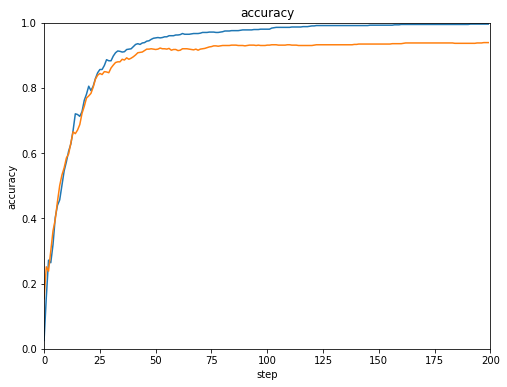

In [14]:
plot_result2(train_loss,test_loss,'loss function','step','loss function',0.0,4.0)
plot_result2(train_acc,test_acc,'accuracy','step','accuracy')

In [15]:
import chainer.datasets as ds

In [16]:
train,test = ds.get_mnist()

In [17]:
import chainer.dataset.convert as con

In [18]:
xtrain,ttrain = con.concat_examples(train)
xtest,ttest = con.concat_examples(test)

In [19]:
Dtrain,N = xtrain.shape
print(Dtrain,N)

60000 784


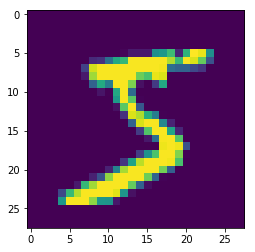

In [20]:
plt.imshow(xtrain[0,:].reshape(28,28))
plt.show()

In [21]:
C = tdata.max()+1
NN = Chain(l1=L.Linear(N,400),l2=L.Linear(400,C),bnorm1 =  L.BatchNormalization(400))

def model(x):
    h = NN.l1(x)
    h = NN.bnorm1(h)
    h = F.relu(h)
    y = NN.l2(h)
    return y

In [22]:
def learning_classification(model,optNN,data,result,T=50):
    for time in range(T):
        NN.zerograds()
        ytrain = model(data[0])
        loss_train = F.softmax_cross_entropy(ytrain,data[2])
        acc_train = F.accuracy(ytrain,ttrain)
        loss_train.backward()
        optNN.update()

        ytest = model(data[1])
        loss_test = F.softmax_cross_entropy(ytest,data[3])
        acc_test = F.accuracy(ytest,ttest)
        result[0].append(loss_train.data)
        result[1].append(loss_test.data)
        result[2].append(acc_train.data)
        result[3].append(acc_test.data)

In [23]:
optNN = Opt.MomentumSGD()
optNN.setup(NN)

In [24]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []
data = [xtrain,xtest,ttrain,ttest]
result = [train_loss,test_loss,train_acc,test_acc]

In [25]:
learning_classification(model,optNN,data,result)

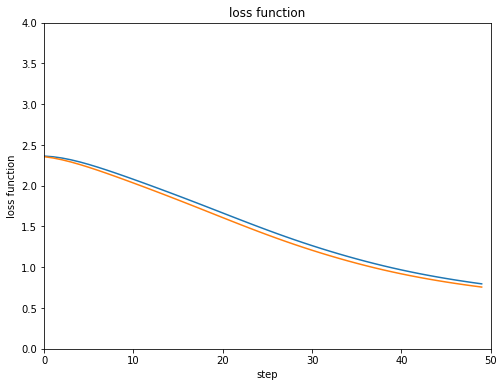

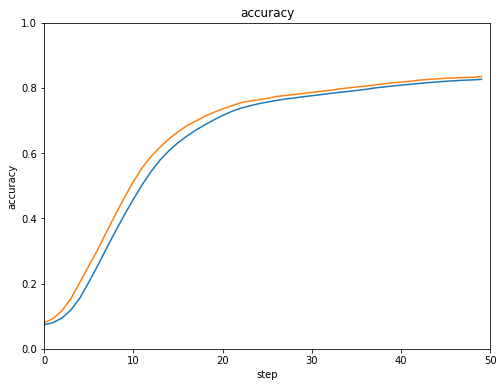

In [26]:
plot_result2(result[0],result[1],"loss function","step","loss function",0.0,4.0)
plot_result2(result[2],result[3],"accuracy","step","accuracy")